# Mini Project
## Predicting sevirity of road accidents using road accident records

In [33]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [34]:
csv_data = pd.read_csv('./Road Accident Data.csv', low_memory=False)
csv_data.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [35]:
print("\nData type :", type(csv_data))
print("\nData dims : ", csv_data.shape)
print("\nData dtypes : ", csv_data.dtypes)


Data type : <class 'pandas.core.frame.DataFrame'>

Data dims :  (307973, 21)

Data dtypes :  Accident_Index                 object
Accident Date                  object
Day_of_Week                    object
Junction_Control               object
Junction_Detail                object
Accident_Severity              object
Latitude                      float64
Light_Conditions               object
Local_Authority_(District)     object
Carriageway_Hazards            object
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                   object
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                     int64
Time                           object
Urban_or_Rural_Area            object
Weather_Conditions             object
Vehicle_Type                   object
dtype: object


In [ ]:
csv_data['Accident_Severity'].replace(['Fetal'], ['Fatal'], inplace=True)
# csv_data['Accident_Severity'].replace(['Slight', 'Serious', 'Fatal', 'Fetal'], [0, 1, 2, 2], inplace=True)
# csv_data['Day_of_Week'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [1, 2, 3, 4, 5, 6, 7], inplace=True)
# csv_data['Light_Conditions'].replace(['Daylight', 'Darkness - lights lit', 'Darkness - no lighting', 'Darkness - lighting unknown', 'Darkness - lights unlit'], [1, 2, 3, 4, 5], inplace=True)
# csv_data['Road_Surface_Conditions'].replace(['Dry', 'Wet or damp', 'Frost or ice', 'Snow', 'Flood over 3cm. deep'], [1, 2, 3, 4, 5], inplace=True)
# csv_data['Weather_Conditions'].replace(['Fine no high winds', 'Raining no high winds', 'Other', 'Snowing no high winds', 'Raining + high winds', 'Fine + high winds', 'Fog or mist', 'Snowing + high winds'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
# csv_data['Vehicle_Type'].replace(['Car', 'Van / Goods 3.5 tonnes mgw or under', 'Motorcycle over 500cc', 'Bus or coach (17 or more pass seats)', 'Motorcycle 125cc and under', 'Goods 7.5 tonnes mgw and over', 'Taxi/Private hire car', 'Motorcycle 50cc and under', 'Motorcycle over 125cc and up to 500cc', 'Other vehicle', 'Goods over 3.5t. and under 7.5t', 'Minibus (8 - 16 passenger seats)', 'Agricultural vehicle', 'Pedal cycle', 'Ridden horse'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], inplace=True)


print(csv_data['Weather_Conditions'].value_counts(), "\n")
print(csv_data['Vehicle_Type'].value_counts(), "\n")

Weather_Conditions
Fine no high winds       244496
Raining no high winds     34877
Other                      8802
Snowing no high winds      4839
Raining + high winds       3526
Fine + high winds          3148
Fog or mist                1690
Snowing + high winds        538
Name: count, dtype: int64 

Vehicle_Type
Car                                      239794
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Agricultural vehicle                        749
Pedal cycle                                  66
Ridden horse

In [37]:
working_data = pd.DataFrame(csv_data[[
    'Day_of_Week',
    'Light_Conditions', 
    'Accident_Severity',  
    'Road_Surface_Conditions', 
    'Speed_limit',
    'Weather_Conditions',
    'Vehicle_Type'
]])

working_data.head()

,Day_of_Week,Light_Conditions,Accident_Severity,Road_Surface_Conditions,Speed_limit,Weather_Conditions,Vehicle_Type
0,Thursday,Daylight,Serious,Dry,30,Fine no high winds,Car
1,Monday,Daylight,Serious,Wet or damp,30,Fine no high winds,Taxi/Private hire car
2,Sunday,Daylight,Slight,Dry,30,Fine no high winds,Taxi/Private hire car
3,Monday,Daylight,Serious,Frost or ice,30,Other,Motorcycle over 500cc
4,Tuesday,Darkness - lights lit,Serious,Dry,30,Fine no high winds,Car


In [38]:
jointDF = pd.concat([
    working_data['Accident_Severity'], 
    working_data['Day_of_Week'], 
    working_data['Light_Conditions'],
    working_data['Road_Surface_Conditions'],
    working_data['Speed_limit'],
    working_data['Weather_Conditions'],
    working_data['Vehicle_Type'],
], axis=1)
# jointDF.corr()

In [39]:
# sb.heatmap(jointDF.select_dtypes('number').corr())

<Axes: xlabel='Day_of_Week', ylabel='count'>

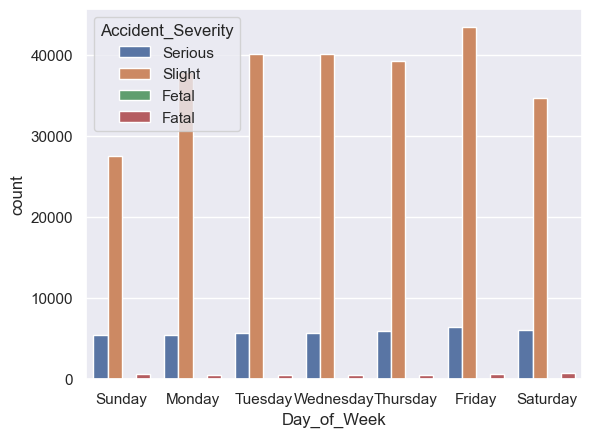

In [40]:
days_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

sb.countplot(data=csv_data, x='Day_of_Week', hue='Accident_Severity', order=days_order)


[Text(0, 0, 'Daylight'),
 Text(1, 0, 'Darkness - lights lit'),
 Text(2, 0, 'Darkness - lighting unknown'),
 Text(3, 0, 'Darkness - lights unlit'),
 Text(4, 0, 'Darkness - no lighting')]

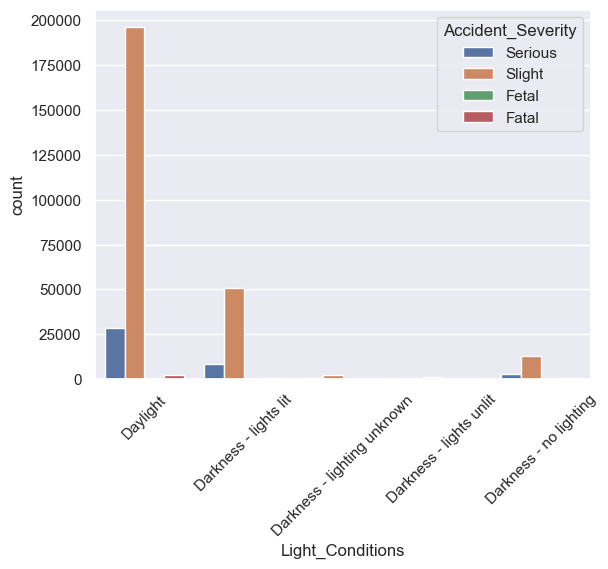

In [41]:
#  'Day_of_Week',
#     'Light_Conditions', 
#     'Accident_Severity',  
#     'Road_Surface_Conditions', 
#     'Speed_limit',
#     'Weather_Conditions',
#     'Vehicle_Type'

ax = sb.countplot(data=csv_data, x='Light_Conditions', hue='Accident_Severity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'Dry'),
 Text(1, 0, 'Wet or damp'),
 Text(2, 0, 'Frost or ice'),
 Text(3, 0, 'Snow'),
 Text(4, 0, 'Flood over 3cm. deep')]

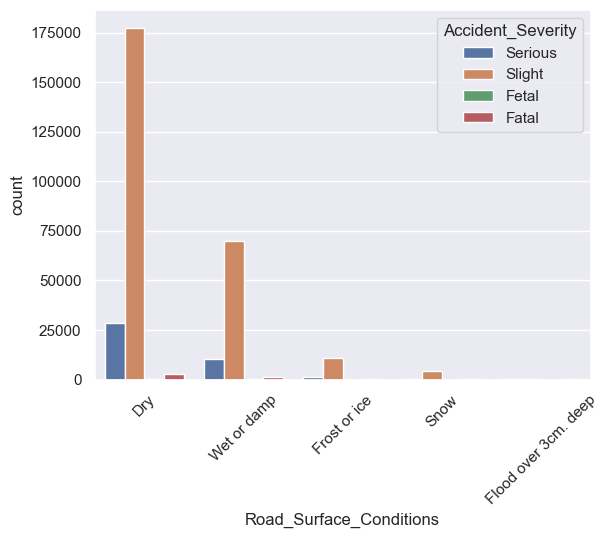

In [42]:
#  'Day_of_Week',
#     'Light_Conditions', 
#     'Accident_Severity',  
#     'Road_Surface_Conditions', 
#     'Speed_limit',
#     'Weather_Conditions',
#     'Vehicle_Type'

ax = sb.countplot(data=csv_data, x='Road_Surface_Conditions', hue='Accident_Severity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, '10'),
 Text(1, 0, '15'),
 Text(2, 0, '20'),
 Text(3, 0, '30'),
 Text(4, 0, '40'),
 Text(5, 0, '50'),
 Text(6, 0, '60'),
 Text(7, 0, '70')]

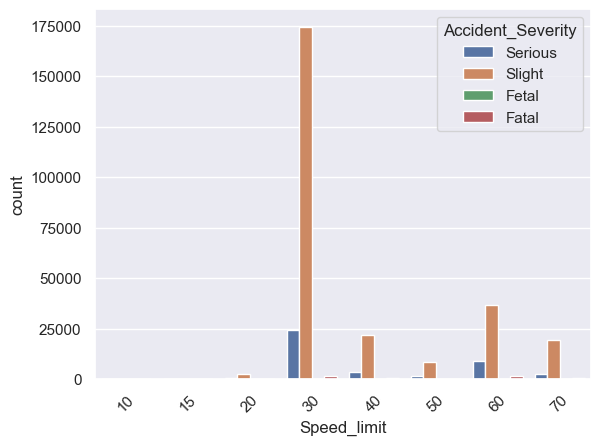

In [43]:
ax = sb.countplot(data=csv_data, x='Speed_limit', hue='Accident_Severity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'Fine no high winds'),
 Text(1, 0, 'Other'),
 Text(2, 0, 'Raining no high winds'),
 Text(3, 0, 'Snowing no high winds'),
 Text(4, 0, 'Fine + high winds'),
 Text(5, 0, 'Raining + high winds'),
 Text(6, 0, 'Snowing + high winds'),
 Text(7, 0, 'Fog or mist')]

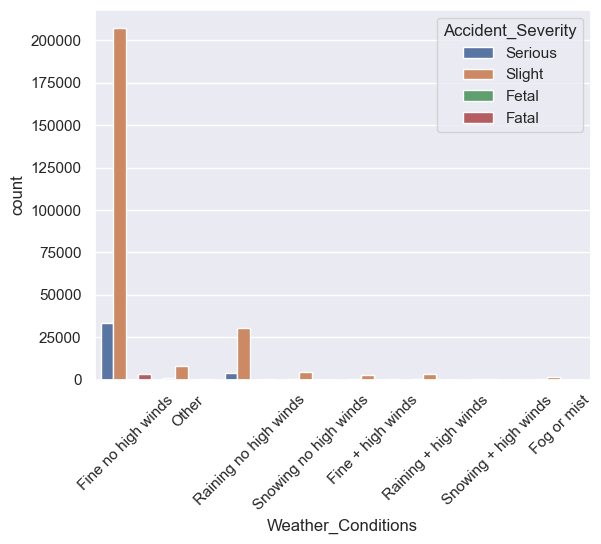

In [44]:
ax = sb.countplot(data=csv_data, x='Weather_Conditions', hue='Accident_Severity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'Car'),
 Text(1, 0, 'Taxi/Private hire car'),
 Text(2, 0, 'Motorcycle over 500cc'),
 Text(3, 0, 'Van / Goods 3.5 tonnes mgw or under'),
 Text(4, 0, 'Goods over 3.5t. and under 7.5t'),
 Text(5, 0, 'Motorcycle 125cc and under'),
 Text(6, 0, 'Motorcycle 50cc and under'),
 Text(7, 0, 'Bus or coach (17 or more pass seats)'),
 Text(8, 0, 'Goods 7.5 tonnes mgw and over'),
 Text(9, 0, 'Other vehicle'),
 Text(10, 0, 'Motorcycle over 125cc and up to 500cc'),
 Text(11, 0, 'Agricultural vehicle'),
 Text(12, 0, 'Minibus (8 - 16 passenger seats)'),
 Text(13, 0, 'Pedal cycle'),
 Text(14, 0, 'Ridden horse')]

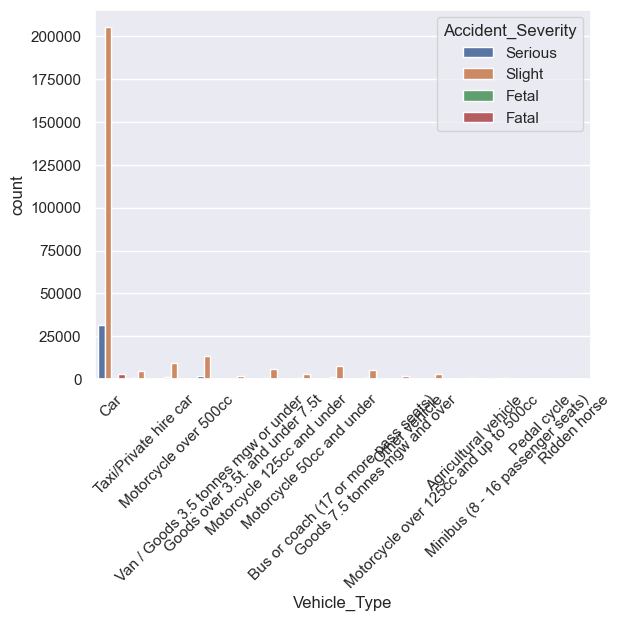

In [45]:
ax = sb.countplot(data=csv_data, x='Vehicle_Type', hue='Accident_Severity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)